<a href="https://colab.research.google.com/github/HeptaDecane/LP1_SEM7/blob/main/C04/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl https://raw.githubusercontent.com/HeptaDecane/LP1_SEM7/main/C04/Train.csv --output Train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3030k  100 3030k    0     0  64.3M      0 --:--:-- --:--:-- --:--:-- 64.3M


In [2]:
!curl https://raw.githubusercontent.com/HeptaDecane/LP1_SEM7/main/C04/Test.csv --output Test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1597k  100 1597k    0     0  13.6M      0 --:--:-- --:--:-- --:--:-- 13.6M


In [3]:
import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split

import re

In [4]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

In [5]:
train_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


([<matplotlib.patches.Wedge at 0x7ff240717290>,
 [Text(-1.073398425069864, 0.24044920681411253, ''),
  Text(1.0733984363261024, -0.2404491565647056, 'Hate')],
 [Text(-0.5854900500381076, 0.13115411280769773, '92.99'),
  Text(0.585490056177874, -0.13115408539893034, '7.01')])

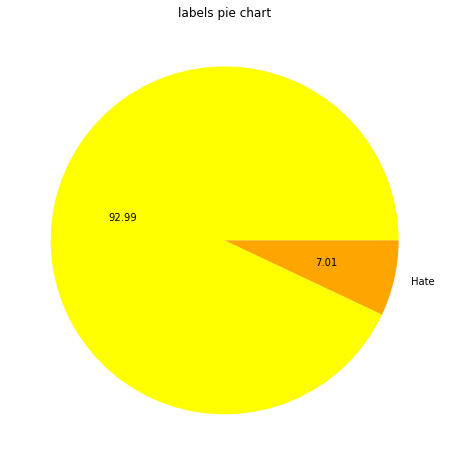

In [7]:
fig, axs = plt.subplots(figsize=(8,8))
axs.set_title('labels pie chart')
plt.pie(train_df['label'].value_counts(),labels=[None,'Hate'],autopct='%.2f',colors=['yellow','orange'])

### Data Cleaning

In [8]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def clean_sentences(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9^,!.\/']", " ", text)
    text = " ".join(text.split())
    text = " ".join(stemmer.stem(word) for word in text.split())
    return text

In [9]:
train_df['tweet'] = train_df['tweet'].apply(lambda tweet: clean_sentences(tweet))
test_df['tweet'] = test_df['tweet'].apply(lambda tweet: clean_sentences(tweet))

In [10]:
train_df['tweet'].head()

0    user when a father is dysfunct and is so selfi...
1    user user thank for lyft credit i can't use ca...
2                                  bihday your majesti
3    model i love u take with u all the time in ur !!!
4                          factsguid societi now motiv
Name: tweet, dtype: object

In [11]:
test_df['tweet'].head()

0    studiolif aislif requir passion dedic willpow ...
1    user white supremacist want everyon to see the...
2    safe way to heal your acne!! altwaystoh health...
3    is the hp and the curs child book up for reser...
4    3rd bihday to my amazing, hilari nephew eli ah...
Name: tweet, dtype: object

### Model Building

In [12]:
x = train_df['tweet']
y = train_df['label']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=73)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [14]:
from sklearn.svm import LinearSVC
model = LinearSVC(C=1.05, tol=0.5)
model.fit(x_train,y_train)

LinearSVC(C=1.05, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.5,
          verbose=0)

In [15]:
model.score(x_train,y_train)

0.9952859705477451

In [16]:
test_set_prediction = model.predict(x_test)

In [17]:
matrix = metrics.confusion_matrix(y_test,test_set_prediction)
matrix_df = pd.DataFrame(data=matrix,index=['-ve','+ve'],columns=['predicted -ve','predicted +ve'])
matrix_df

,predicted -ve,predicted +ve
-ve,7337,55
+ve,232,367


In [18]:
print(metrics.classification_report(y_test,test_set_prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7392
           1       0.87      0.61      0.72       599

    accuracy                           0.96      7991
   macro avg       0.92      0.80      0.85      7991
weighted avg       0.96      0.96      0.96      7991



### Prediction

In [19]:
x_train = train_df['tweet']
y_train = train_df['label']
x_test = test_df['tweet']

In [20]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [21]:
model.fit(x_train,y_train)

LinearSVC(C=1.05, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.5,
          verbose=0)

In [22]:
prediction_df = test_df[['id']]
prediction_df['label'] = model.predict(x_test)
prediction_df

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


([<matplotlib.patches.Wedge at 0x7ff2407dcfd0>,
 [Text(-1.084230701132999, 0.18559037345898455, ''),
  Text(1.0842307098211104, -0.1855903227024818, 'Hate')],
 [Text(-0.5913985642543631, 0.10123111279580974, '94.60'),
  Text(0.5913985689933329, -0.10123108511044461, '5.40')])

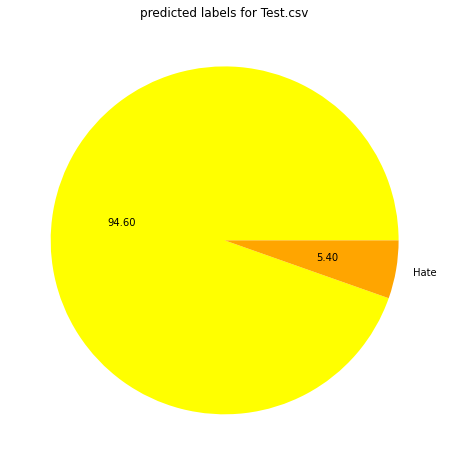

In [23]:
fig, axs = plt.subplots(figsize=(8,8))
axs.set_title('predicted labels for Test.csv')
plt.pie(prediction_df['label'].value_counts(),labels=[None,'Hate'],autopct='%.2f',colors=['yellow','orange'])

In [24]:
prediction_df.to_csv('Prediction.csv')